In [1]:
# 실습용 데이터 패키지
from sklearn.datasets import load_boston

# 데이터 전처리 패키지
import numpy as np
import pandas as pd

# 기계학습 모델 구축 및 평가 패키지
import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

In [2]:
import pandas as pd
data = pd.read_csv('rain.csv')

In [3]:
data

,time,rain,month
0,1,0,Jan
1,2,0,Feb
2,3,0,Mar
3,4,17,Apr
4,5,22,May
5,6,29,Jun
6,7,16,Jul
7,8,8,Aug
8,9,0,Sep
9,10,8,Oct


In [4]:
x = pd.DataFrame(data.time, columns=['time'])

In [5]:
y = pd.DataFrame(data.rain, columns=['rain'])

In [6]:
data_shape=data.shape
data_dtypes=data.dtypes

In [7]:
data.info()
print(data_shape)
print(data_dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 3 columns):
time     219 non-null int64
rain     219 non-null int64
month    219 non-null object
dtypes: int64(2), object(1)
memory usage: 5.2+ KB
(219, 3)
time      int64
rain      int64
month    object
dtype: object


In [8]:
data.describe()

,time,rain
count,219.000000,219.000000
mean,110.000000,13.173516
std,63.364028,18.113228
min,1.000000,0.000000
25%,55.500000,4.000000
50%,110.000000,6.000000
75%,164.500000,14.000000
max,219.000000,100.000000


## 변수 더미화

In [9]:
data=pd.get_dummies(data, columns=['month'])
data

,time,rain,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2,0,0,0,0,1,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,17,1,0,0,0,0,0,0,0,0,0,0,0
4,5,22,0,0,0,0,0,0,0,0,1,0,0,0
5,6,29,0,0,0,0,0,0,1,0,0,0,0,0
6,7,16,0,0,0,0,0,1,0,0,0,0,0,0
7,8,8,0,1,0,0,0,0,0,0,0,0,0,0
8,9,0,0,0,0,0,0,0,0,0,0,0,0,1
9,10,8,0,0,0,0,0,0,0,0,0,0,1,0


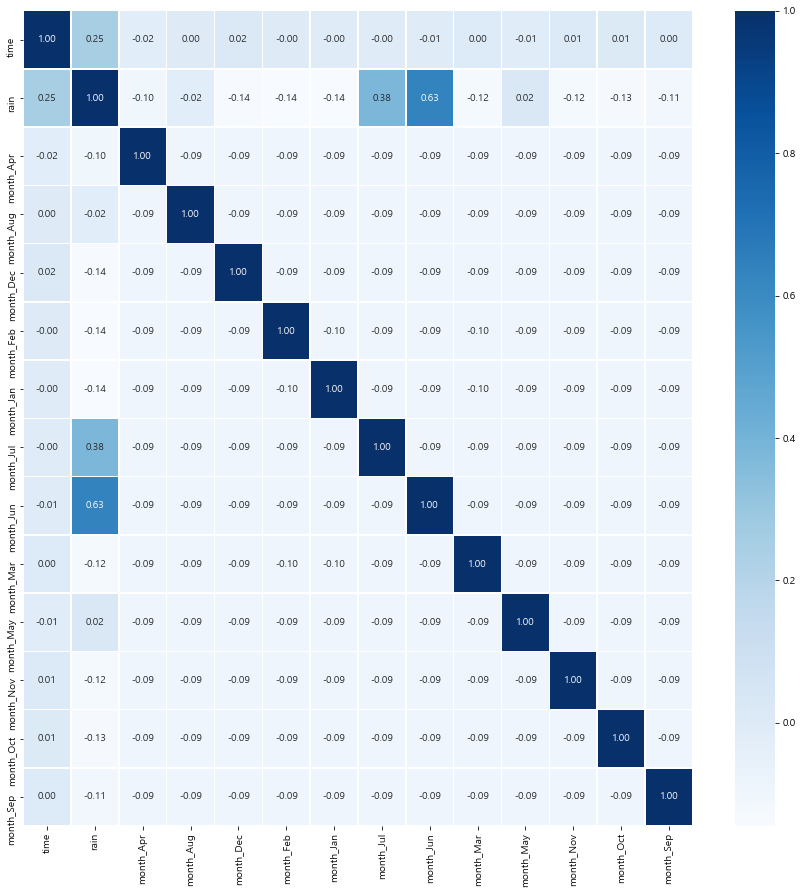

In [10]:
plt.figure(figsize=(15, 15))
sns.heatmap(data=data.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

In [11]:
data.drop(['month_Dec'], axis=1)

,time,rain,month_Apr,month_Aug,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,2,0,0,0,1,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,1,0,0,0,0
3,4,17,1,0,0,0,0,0,0,0,0,0,0
4,5,22,0,0,0,0,0,0,0,1,0,0,0
5,6,29,0,0,0,0,0,1,0,0,0,0,0
6,7,16,0,0,0,0,1,0,0,0,0,0,0
7,8,8,0,1,0,0,0,0,0,0,0,0,0
8,9,0,0,0,0,0,0,0,0,0,0,0,1
9,10,8,0,0,0,0,0,0,0,0,0,1,0


In [12]:
X = data.drop(['rain'], axis=1)
y = data['rain']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

## 최소제곱법을 통한 다중회귀모델 구축

In [14]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train, axis=1)
model_trained = model.fit()

## QQ plot

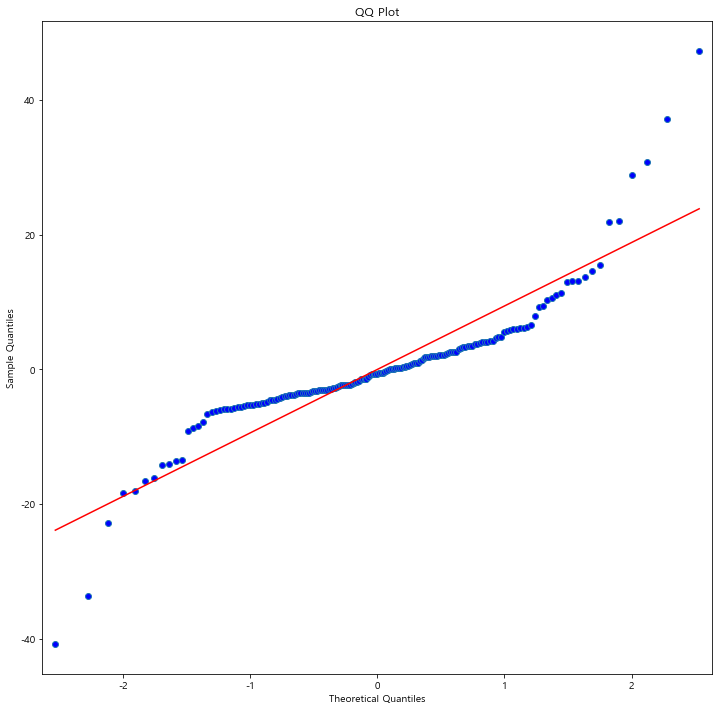

In [15]:
model_residuals = model_trained.resid

plt.rcParams['axes.unicode_minus'] = False # 음수 폰트 깨짐 방지
fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

## Residual

[Text(0,0.5,'Residuals'), Text(0.5,0,'Fitted values')]

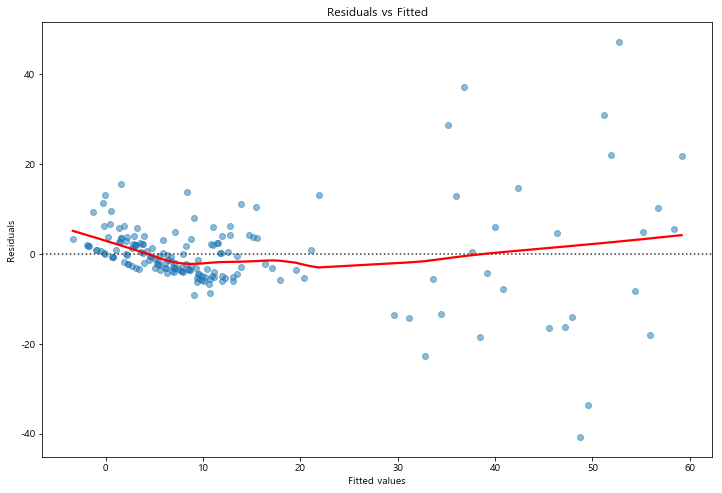

In [16]:
model_fitted_y= model_trained.fittedvalues

fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(12)

sns.residplot(model_fitted_y, y_train, data=X_train, lowess=True, scatter_kws={'alpha': 0.5}, 
              line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted values', ylabel='Residuals')

In [17]:
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   rain   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     35.06
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           6.48e-39
Time:                        12:16:18   Log-Likelihood:                -640.82
No. Observations:                 175   AIC:                             1308.
Df Residuals:                     162   BIC:                             1349.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3440      1.393      3.837      0.0

## 로그함수화

In [18]:
y_log = np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size = 0.2, random_state = 2021)
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train, axis = 1)
model_trained = model.fit()

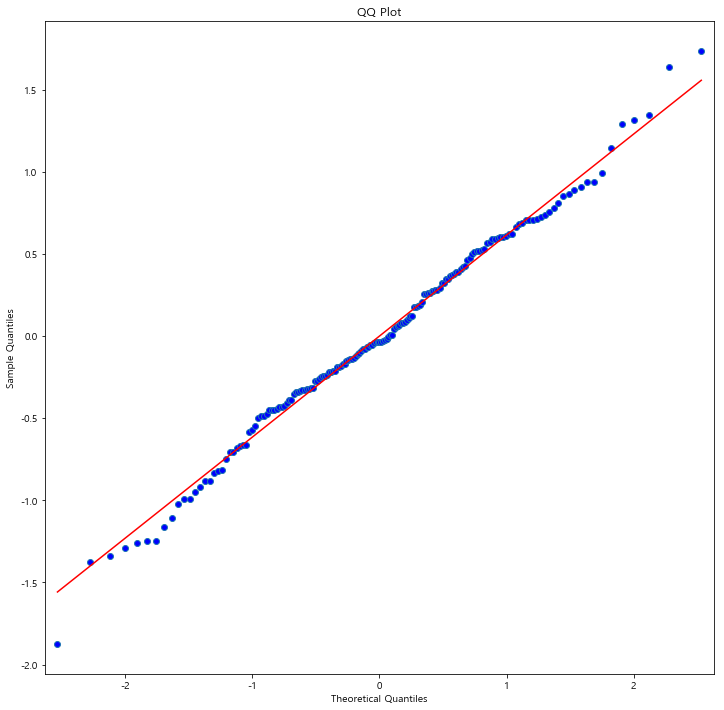

In [19]:
model_residuals = model_trained.resid

plt.rcParams['axes.unicode_minus'] = False # 음수 폰트 깨짐 방지
fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

[Text(0,0.5,'Residuals'), Text(0.5,0,'Fitted values')]

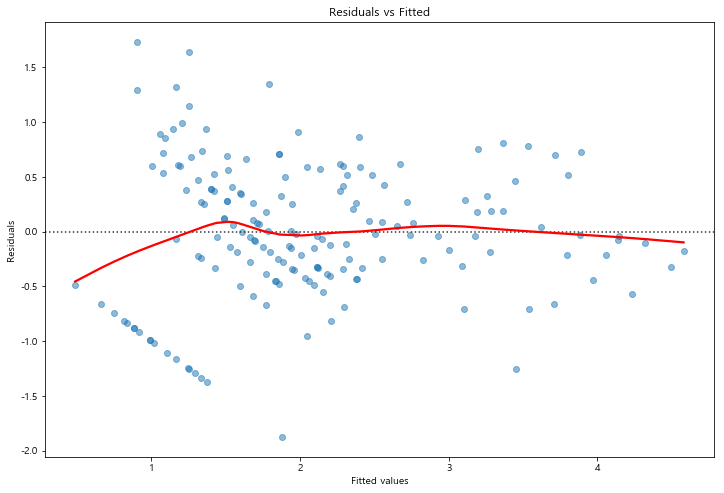

In [20]:
model_fitted_y= model_trained.fittedvalues

fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(12)

sns.residplot(model_fitted_y, y_train, data=X_train, lowess=True, scatter_kws={'alpha': 0.5}, 
              line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted values', ylabel='Residuals')

In [21]:
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   rain   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     28.04
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           1.46e-33
Time:                        12:16:19   Log-Likelihood:                -163.36
No. Observations:                 175   AIC:                             352.7
Df Residuals:                     162   BIC:                             393.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1882      0.091     13.059      0.0

In [22]:
model = sm.OLS(y_train, X_train.drop(['month_Aug', 'month_Nov'], axis=1))
model_trained = model.fit()
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   rain   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     30.67
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           3.07e-34
Time:                        12:16:19   Log-Likelihood:                -163.56
No. Observations:                 175   AIC:                             351.1
Df Residuals:                     163   BIC:                             389.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0672      0.146      7.299      0.0

In [38]:
import pandas as pd
data = pd.read_csv('rainfall.csv')

In [39]:
data.describe()

,time,rain
count,135.000000,135.000000
mean,68.000000,16.866667
std,39.115214,21.130299
min,1.000000,2.000000
25%,34.500000,5.000000
50%,68.000000,7.000000
75%,101.500000,16.500000
max,135.000000,100.000000


In [40]:
data=pd.get_dummies(data, columns=['month'])
data

,time,rain,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1,5,0,0,0,0,1,0,0,0,0,0,0,0
1,2,6,0,0,0,1,0,0,0,0,0,0,0,0
2,3,4,0,0,0,0,0,0,0,1,0,0,0,0
3,4,12,1,0,0,0,0,0,0,0,0,0,0,0
4,5,25,0,0,0,0,0,0,0,0,1,0,0,0
5,6,82,0,0,0,0,0,0,1,0,0,0,0,0
6,7,64,0,0,0,0,0,1,0,0,0,0,0,0
7,8,12,0,1,0,0,0,0,0,0,0,0,0,0
8,9,6,0,0,0,0,0,0,0,0,0,0,0,1
9,10,5,0,0,0,0,0,0,0,0,0,0,1,0


In [41]:
data.drop(['month_Dec'], axis=1)

,time,rain,month_Apr,month_Aug,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1,5,0,0,0,1,0,0,0,0,0,0,0
1,2,6,0,0,1,0,0,0,0,0,0,0,0
2,3,4,0,0,0,0,0,0,1,0,0,0,0
3,4,12,1,0,0,0,0,0,0,0,0,0,0
4,5,25,0,0,0,0,0,0,0,1,0,0,0
5,6,82,0,0,0,0,0,1,0,0,0,0,0
6,7,64,0,0,0,0,1,0,0,0,0,0,0
7,8,12,0,1,0,0,0,0,0,0,0,0,0
8,9,6,0,0,0,0,0,0,0,0,0,0,1
9,10,5,0,0,0,0,0,0,0,0,0,1,0


In [42]:
X = data.drop(['rain'], axis=1)
y = data['rain']

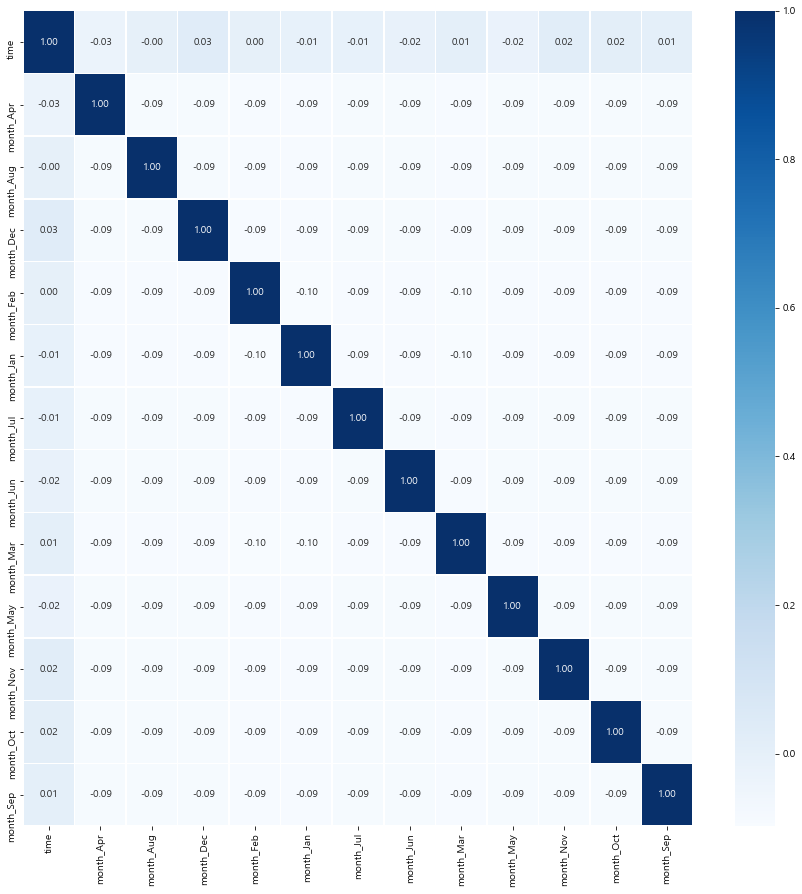

In [43]:
plt.figure(figsize=(15, 15))
sns.heatmap(data=X.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

In [45]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train, axis=1)
model_trained = model.fit()

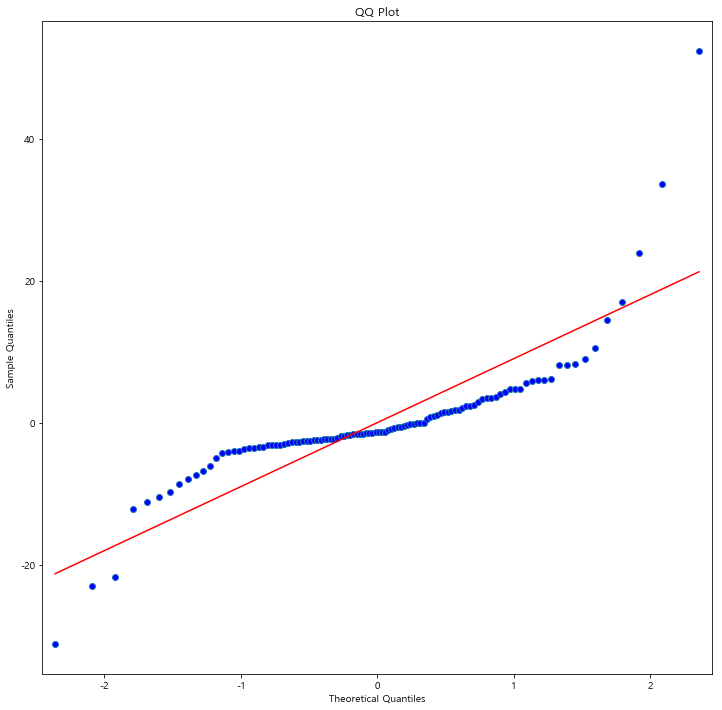

In [46]:
model_residuals = model_trained.resid

plt.rcParams['axes.unicode_minus'] = False # 음수 폰트 깨짐 방지
fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

[Text(0,0.5,'Residuals'), Text(0.5,0,'Fitted values')]

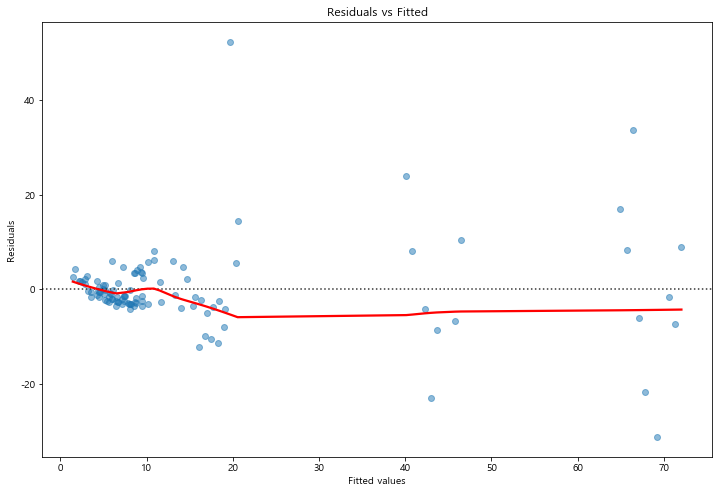

In [47]:
model_fitted_y= model_trained.fittedvalues

fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(12)

sns.residplot(model_fitted_y, y_train, data=X_train, lowess=True, scatter_kws={'alpha': 0.5}, 
              line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted values', ylabel='Residuals')

In [48]:
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   rain   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     33.21
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           9.84e-29
Time:                        12:16:47   Log-Likelihood:                -390.75
No. Observations:                 108   AIC:                             807.5
Df Residuals:                      95   BIC:                             842.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.6002      1.771      6.549      0.0

In [49]:
model = sm.OLS(y_train, X_train.drop(['month_Aug', 'month_May'], axis=1))
model_trained = model.fit()
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   rain   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     36.61
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           1.59e-29
Time:                        12:16:50   Log-Likelihood:                -390.75
No. Observations:                 108   AIC:                             805.5
Df Residuals:                      96   BIC:                             837.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9662      2.774      4.674      0.0

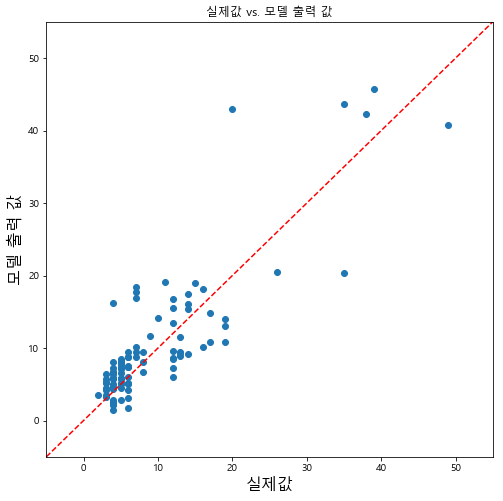

In [61]:
y_train_pred = model_trained.fittedvalues

plt.figure(figsize=(8, 8))
plt.title('실제값 vs. 모델 출력 값')
plt.scatter(y_train, y_train_pred)
plt.plot([-5, 55], [-5, 55], ls="--", c='red')
plt.xlabel('실제값', size=16)
plt.ylabel('모델 출력 값', size=16)
plt.xlim(-5, 55)
plt.ylim(-5, 55)
plt.show()

In [51]:
X_test = sm.add_constant(X_test)

In [53]:
y_test_pred = model_trained.predict(X_test.drop(['month_Aug', 'month_May'], axis=1))
y_test_pred.head()

4      13.261162
120     7.815153
2       3.752064
35      3.940923
75     10.202480
dtype: float64

## Mean Squared Error (평균 제곱 오차)
$\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}$   

In [54]:
print(mean_squared_error(y_test, y_test_pred))

87.98324215409102


## Root Mean Squared Error (제곱근 평균 제곱 오차)
$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}}$

In [55]:
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

9.379938280931864


## Mean Absolute Error (평균 절대 오차)
$\frac{1}{n} \sum_{i=1}^{n} |y_{i} - \hat{y}_{i}|$

In [56]:
print(mean_absolute_error(y_test, y_test_pred))

5.4470042522169875


## Mean Absolute Percentage Error (평균 절대 백분율 오차)
$\frac{1}{n}\sum_{i=1}^{n} \left|\frac{y_{i} - \hat{y}_{i}}{y_{i}} \right| \times 100\%$

In [57]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

print(mean_absolute_percentage_error(y_test, y_test_pred))

29.037836239440583


## R squared (결정계수)

In [58]:
print(r2_score(y_test, y_test_pred))

0.8279586081865253


## 최종결과정리

In [59]:
print('Training MSE: {:.3f}'.format(mean_squared_error(y_train, y_train_pred)))
print('Training RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print('Training MAE: {:.3f}'.format(mean_absolute_error(y_train, y_train_pred)))
print('Training MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred)))
print('Training R2: {:.3f}'.format(r2_score(y_train, y_train_pred)))

Training MSE: 81.311
Training RMSE: 9.017
Training MAE: 5.135
Training MAPE: 42.497
Training R2: 0.807


In [60]:
print('Testing MSE: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))
print('Testing RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))
print('Testing MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_test, y_test_pred)))
print('Testing R2: {:.3f}'.format(r2_score(y_test, y_test_pred)))

Testing MSE: 87.983
Testing RMSE: 9.380
Testing MAE: 5.447
Testing MAPE: 29.038
Testing R2: 0.828


## Trigonometric

In [36]:
import pandas as pd
data = pd.read_csv('rain.csv')

In [37]:
X = data.drop(['rain','month'],axis = 1)
y = data['rain']

In [5]:
X['sin_2'] = 0
X['cos_2'] = 0
X['sin_4'] = 0
X['cos_4'] = 0

In [7]:
for i in X['time']:
    X.iloc[i-1,1] = round(np.sin(2*np.pi*i/12),6)
    X.iloc[i-1,2] = round(np.cos(2*np.pi*i/12),6)
    X.iloc[i-1,3] = round(np.sin(4*np.pi*i/12),6)
    X.iloc[i-1,4] = round(np.cos(4*np.pi*i/12),6)

In [8]:
X

,time,sin_2,cos_2,sin_4,cos_4
0,1,0.500000,0.866025,0.866025,0.5
1,2,0.866025,0.500000,0.866025,-0.5
2,3,1.000000,0.000000,0.000000,-1.0
3,4,0.866025,-0.500000,-0.866025,-0.5
4,5,0.500000,-0.866025,-0.866025,0.5
5,6,0.000000,-1.000000,-0.000000,1.0
6,7,-0.500000,-0.866025,0.866025,0.5
7,8,-0.866025,-0.500000,0.866025,-0.5
8,9,-1.000000,-0.000000,0.000000,-1.0
9,10,-0.866025,0.500000,-0.866025,-0.5


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

In [10]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train, axis=1)
model_trained = model.fit()

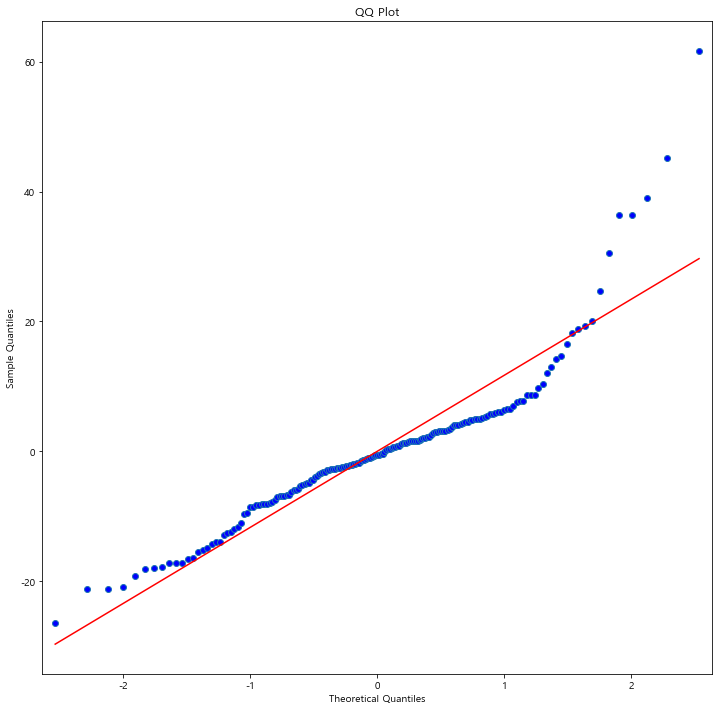

In [11]:
model_residuals = model_trained.resid

plt.rcParams['axes.unicode_minus'] = False # 음수 폰트 깨짐 방지
fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

[Text(0,0.5,'Residuals'), Text(0.5,0,'Fitted values')]

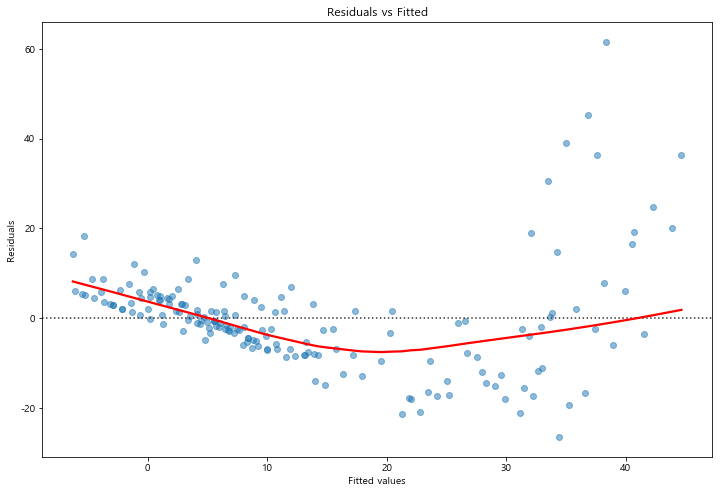

In [12]:
model_fitted_y= model_trained.fittedvalues

fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(12)

sns.residplot(model_fitted_y, y_train, data=X_train, lowess=True, scatter_kws={'alpha': 0.5}, 
              line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted values', ylabel='Residuals')

In [13]:
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   rain   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     44.73
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           3.02e-29
Time:                        16:42:09   Log-Likelihood:                -679.07
No. Observations:                 175   AIC:                             1370.
Df Residuals:                     169   BIC:                             1389.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1982      1.831      3.385      0.0

In [62]:
import pandas as pd
data = pd.read_csv('rain.csv')

In [63]:
X = data.drop(['rain','month'],axis = 1)
y = data['rain']

In [64]:
X['sin_2'] = 0
X['cos_2'] = 0

In [65]:
for i in X['time']:
    X.iloc[i-1,1] = round(np.sin(2*np.pi*i/12),6)
    X.iloc[i-1,2] = round(np.cos(2*np.pi*i/12),6)

In [66]:
X

,time,sin_2,cos_2
0,1,0.500000,0.866025
1,2,0.866025,0.500000
2,3,1.000000,0.000000
3,4,0.866025,-0.500000
4,5,0.500000,-0.866025
5,6,0.000000,-1.000000
6,7,-0.500000,-0.866025
7,8,-0.866025,-0.500000
8,9,-1.000000,-0.000000
9,10,-0.866025,0.500000


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

In [68]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train, axis=1)
model_trained = model.fit()

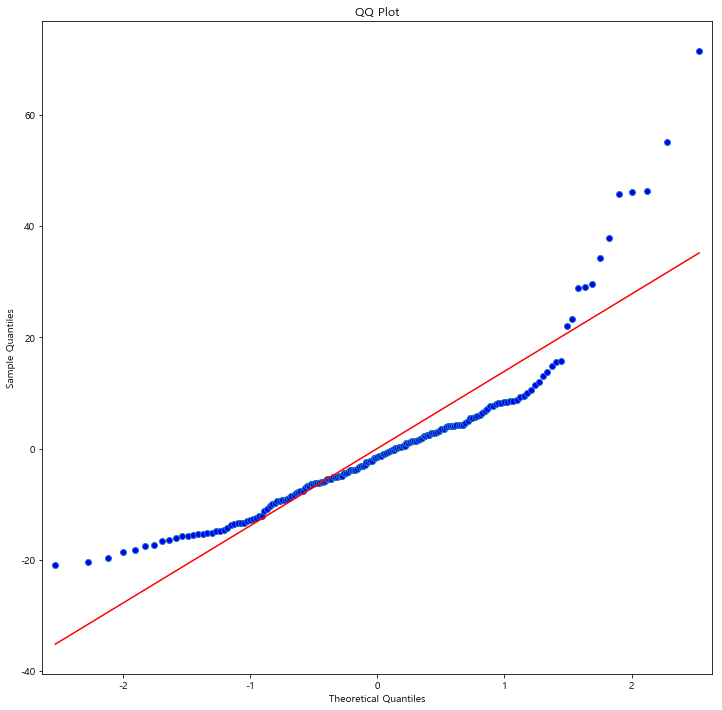

In [69]:
model_residuals = model_trained.resid

plt.rcParams['axes.unicode_minus'] = False # 음수 폰트 깨짐 방지
fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

[Text(0,0.5,'Residuals'), Text(0.5,0,'Fitted values')]

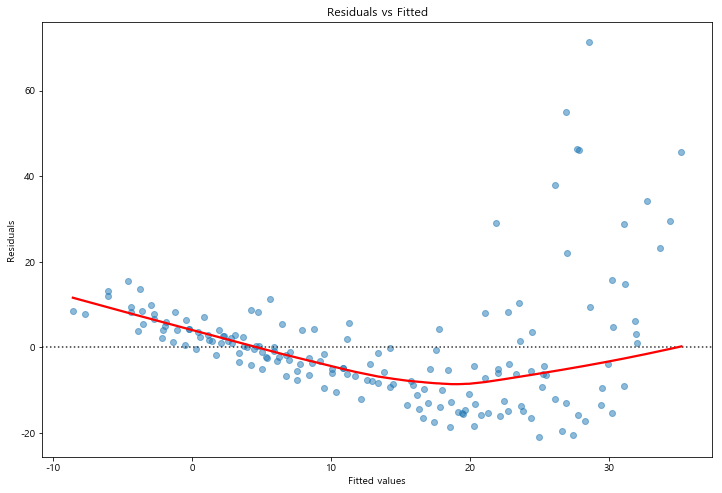

In [70]:
model_fitted_y= model_trained.fittedvalues

fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(12)

sns.residplot(model_fitted_y, y_train, data=X_train, lowess=True, scatter_kws={'alpha': 0.5}, 
              line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted values', ylabel='Residuals')

In [71]:
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   rain   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     37.27
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           1.38e-18
Time:                        12:53:42   Log-Likelihood:                -708.81
No. Observations:                 175   AIC:                             1426.
Df Residuals:                     171   BIC:                             1438.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6057      2.155      2.602      0.0

In [72]:
y_log = np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size = 0.2, random_state = 2021)
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train, axis = 1)
model_trained = model.fit()

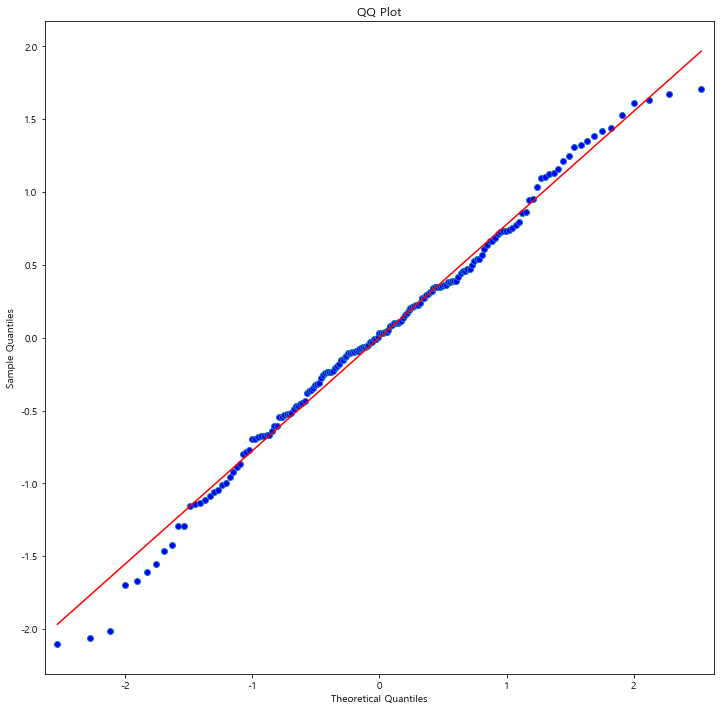

In [73]:
model_residuals = model_trained.resid

plt.rcParams['axes.unicode_minus'] = False # 음수 폰트 깨짐 방지
fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

[Text(0,0.5,'Residuals'), Text(0.5,0,'Fitted values')]

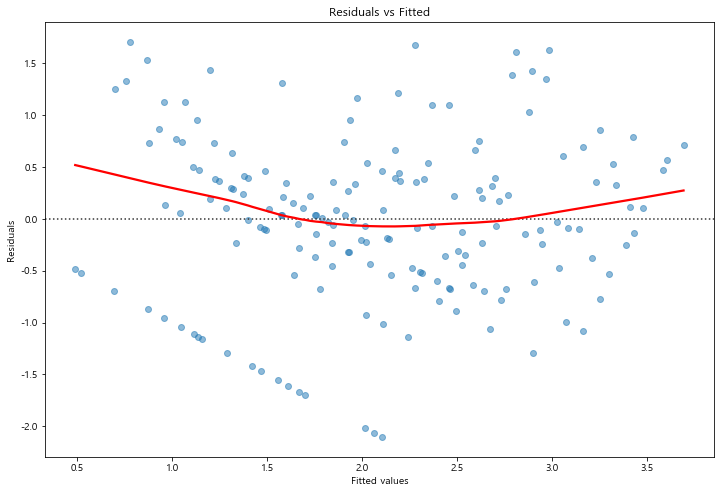

In [74]:
model_fitted_y= model_trained.fittedvalues

fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(12)

sns.residplot(model_fitted_y, y_train, data=X_train, lowess=True, scatter_kws={'alpha': 0.5}, 
              line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted values', ylabel='Residuals')

In [75]:
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   rain   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     53.01
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           2.82e-24
Time:                        12:54:26   Log-Likelihood:                -204.17
No. Observations:                 175   AIC:                             416.3
Df Residuals:                     171   BIC:                             429.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2732      0.121     10.565      0.0

In [105]:
import pandas as pd
data = pd.read_csv('rainfall.csv')

In [106]:
X = data.drop(['rain','month'],axis = 1)
y = data['rain']

In [107]:
X['sin_2'] = 0
X['cos_2'] = 0
X['sin_4'] = 0
X['cos_4'] = 0

In [108]:
for i in X['time']:
    X.iloc[i-1,1] = round(np.sin(2*np.pi*i/12),6)
    X.iloc[i-1,2] = round(np.cos(2*np.pi*i/12),6)
    X.iloc[i-1,3] = round(np.sin(4*np.pi*i/12),6)
    X.iloc[i-1,4] = round(np.cos(4*np.pi*i/12),6)

In [109]:
X

,time,sin_2,cos_2,sin_4,cos_4
0,1,0.500000,0.866025,0.866025,0.5
1,2,0.866025,0.500000,0.866025,-0.5
2,3,1.000000,0.000000,0.000000,-1.0
3,4,0.866025,-0.500000,-0.866025,-0.5
4,5,0.500000,-0.866025,-0.866025,0.5
5,6,0.000000,-1.000000,-0.000000,1.0
6,7,-0.500000,-0.866025,0.866025,0.5
7,8,-0.866025,-0.500000,0.866025,-0.5
8,9,-1.000000,-0.000000,0.000000,-1.0
9,10,-0.866025,0.500000,-0.866025,-0.5


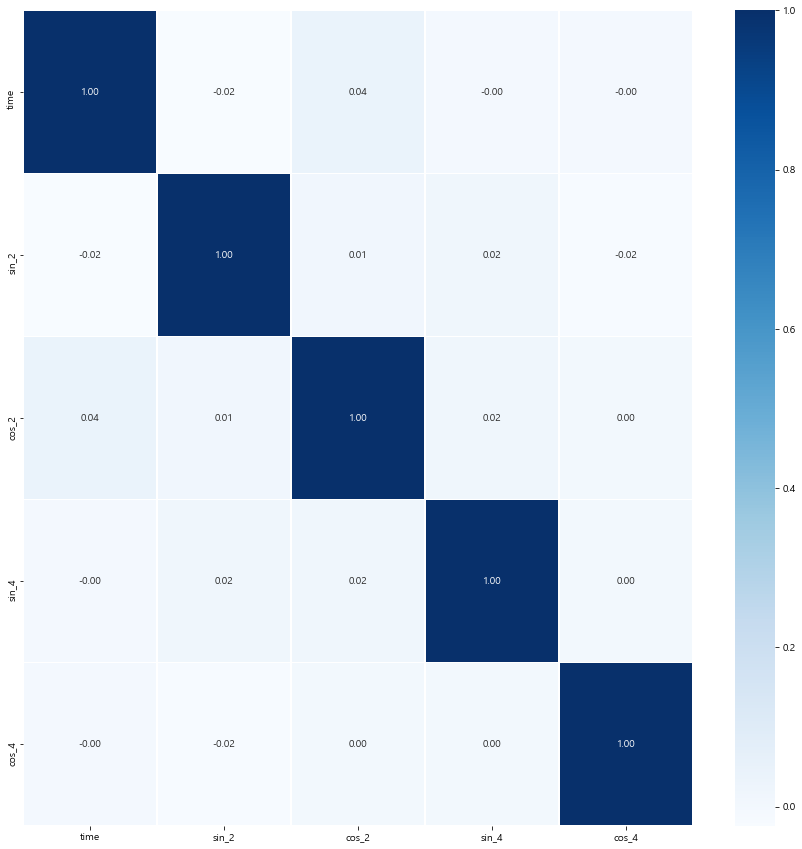

In [110]:
plt.figure(figsize=(15, 15))
sns.heatmap(data=X.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

In [41]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train, axis=1)
model_trained = model.fit()

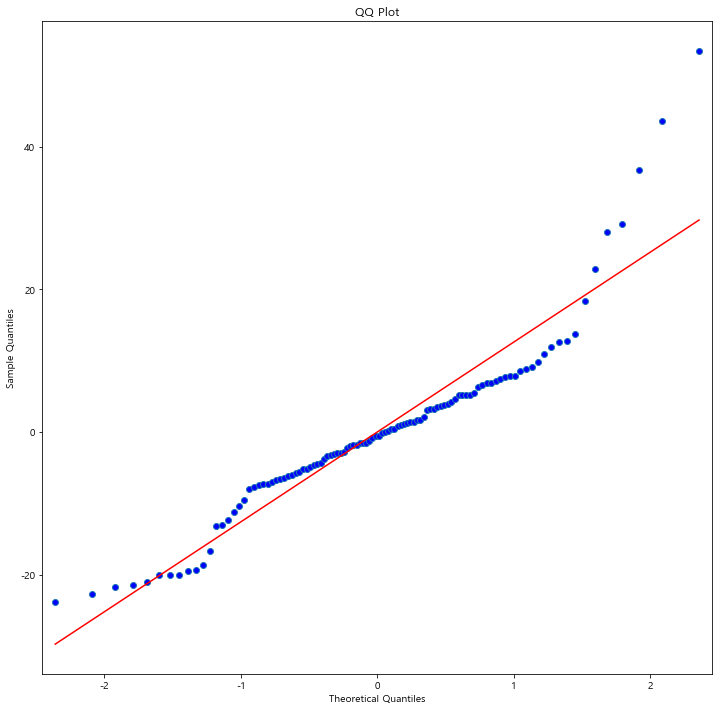

In [42]:
model_residuals = model_trained.resid

plt.rcParams['axes.unicode_minus'] = False # 음수 폰트 깨짐 방지
fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

[Text(0,0.5,'Residuals'), Text(0.5,0,'Fitted values')]

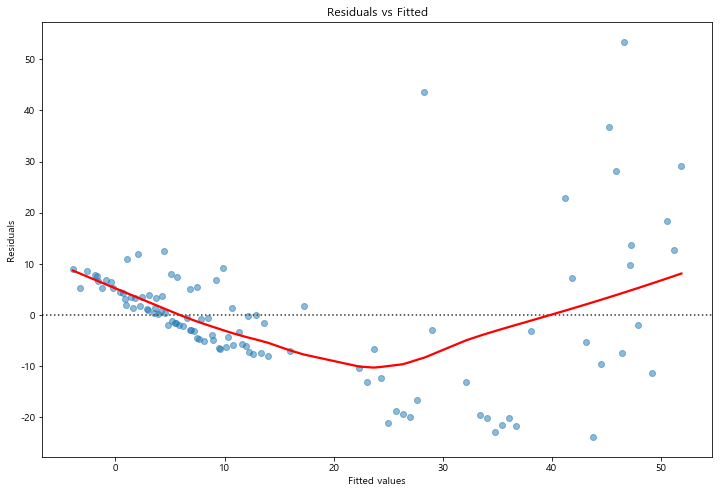

In [43]:
model_fitted_y= model_trained.fittedvalues

fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(12)

sns.residplot(model_fitted_y, y_train, data=X_train, lowess=True, scatter_kws={'alpha': 0.5}, 
              line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted values', ylabel='Residuals')

In [44]:
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   rain   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     33.82
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           3.20e-20
Time:                        01:24:32   Log-Likelihood:                -426.94
No. Observations:                 108   AIC:                             865.9
Df Residuals:                     102   BIC:                             882.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8847      2.571      5.013      0.0

In [111]:
import pandas as pd
data = pd.read_csv('rainfall.csv')

In [112]:
X = data.drop(['rain','month'],axis = 1)
y = data['rain']

In [113]:
X['sin_2'] = 0
X['cos_2'] = 0

In [114]:
for i in X['time']:
    X.iloc[i-1,1] = round(np.sin(2*np.pi*i/12),6)
    X.iloc[i-1,2] = round(np.cos(2*np.pi*i/12),6)

In [115]:
X

,time,sin_2,cos_2
0,1,0.500000,0.866025
1,2,0.866025,0.500000
2,3,1.000000,0.000000
3,4,0.866025,-0.500000
4,5,0.500000,-0.866025
5,6,0.000000,-1.000000
6,7,-0.500000,-0.866025
7,8,-0.866025,-0.500000
8,9,-1.000000,-0.000000
9,10,-0.866025,0.500000


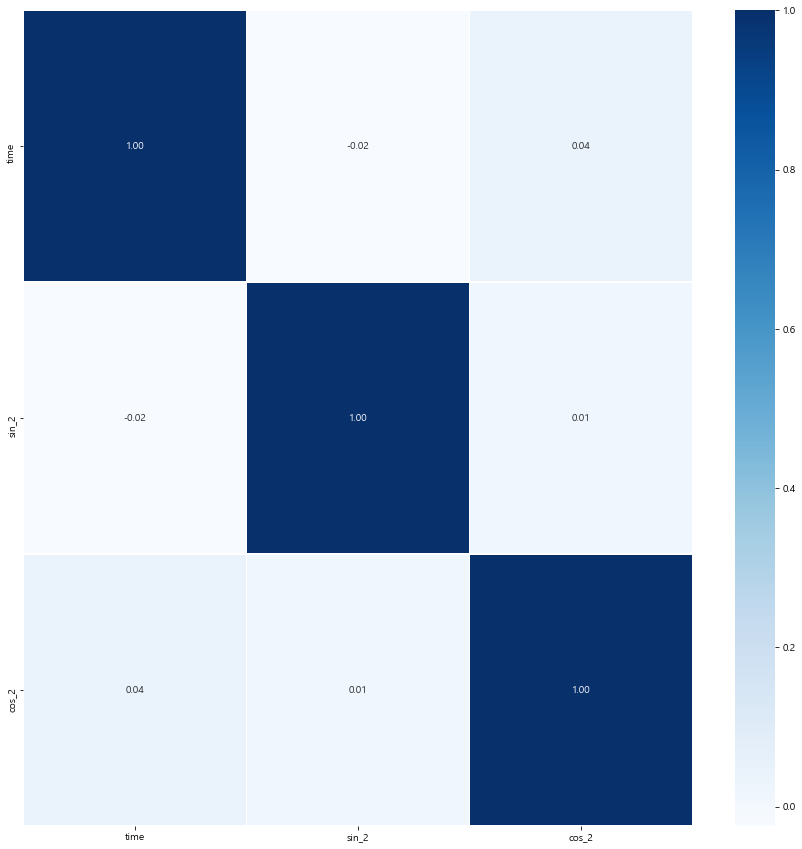

In [116]:
plt.figure(figsize=(15, 15))
sns.heatmap(data=X.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

In [82]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train, axis=1)
model_trained = model.fit()

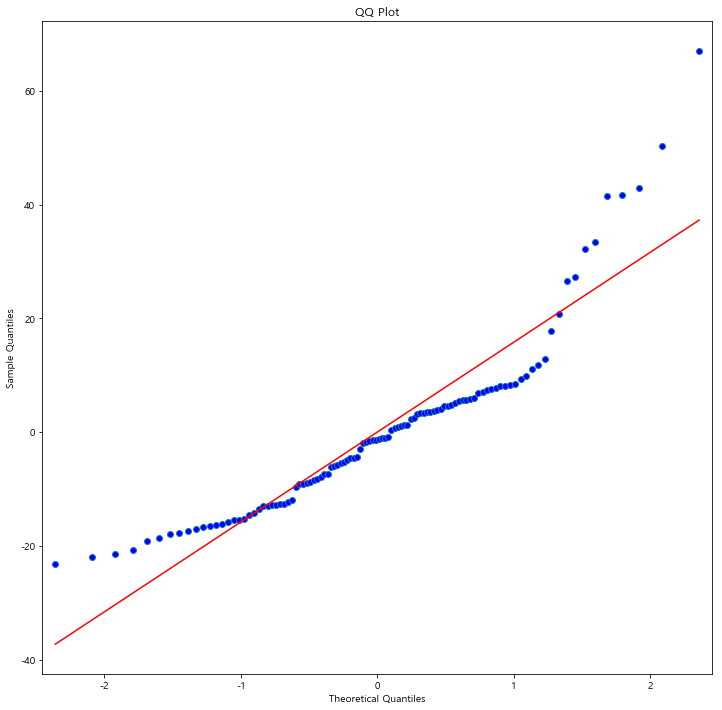

In [83]:
model_residuals = model_trained.resid

plt.rcParams['axes.unicode_minus'] = False # 음수 폰트 깨짐 방지
fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

[Text(0,0.5,'Residuals'), Text(0.5,0,'Fitted values')]

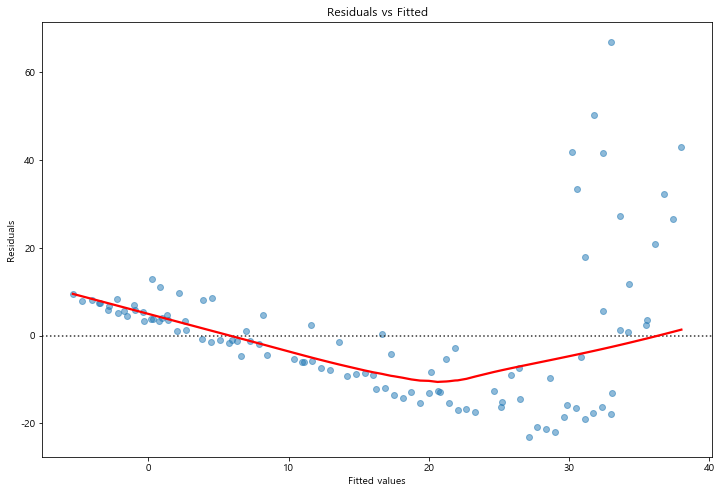

In [84]:
model_fitted_y= model_trained.fittedvalues

fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(12)

sns.residplot(model_fitted_y, y_train, data=X_train, lowess=True, scatter_kws={'alpha': 0.5}, 
              line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted values', ylabel='Residuals')

In [85]:
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   rain   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     23.97
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           7.17e-12
Time:                        12:55:23   Log-Likelihood:                -451.34
No. Observations:                 108   AIC:                             910.7
Df Residuals:                     104   BIC:                             921.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.7340      3.190      3.992      0.0

In [86]:
y_log = np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size = 0.2, random_state = 2021)
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train, axis = 1)
model_trained = model.fit()

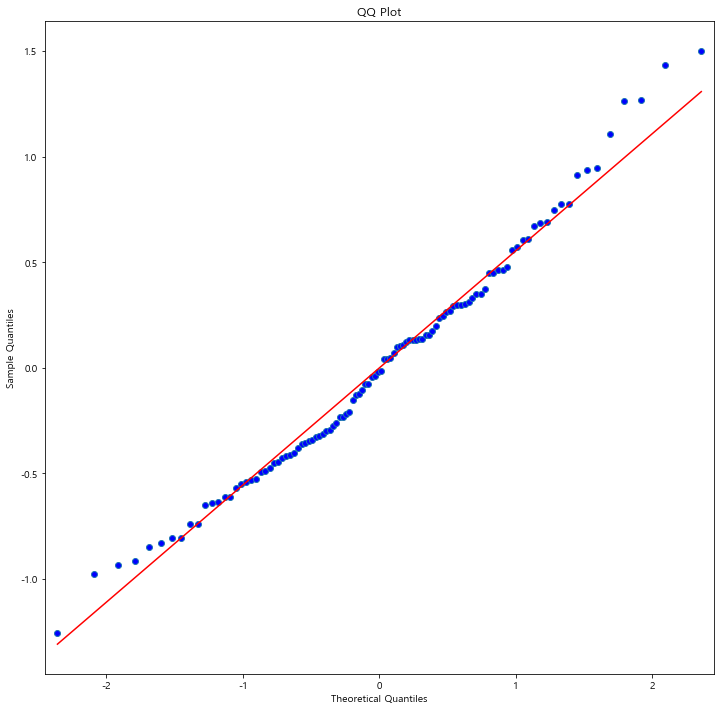

In [87]:
model_residuals = model_trained.resid

plt.rcParams['axes.unicode_minus'] = False # 음수 폰트 깨짐 방지
fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

[Text(0,0.5,'Residuals'), Text(0.5,0,'Fitted values')]

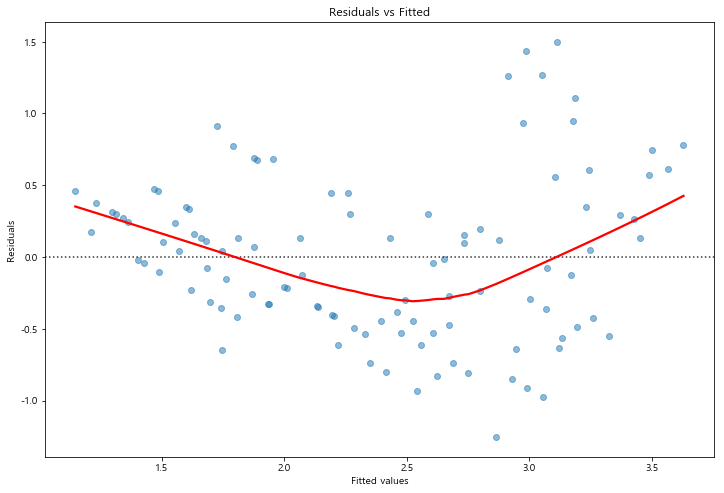

In [88]:
model_fitted_y= model_trained.fittedvalues

fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(12)

sns.residplot(model_fitted_y, y_train, data=X_train, lowess=True, scatter_kws={'alpha': 0.5}, 
              line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted values', ylabel='Residuals')

In [90]:
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   rain   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     50.16
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           3.92e-20
Time:                        13:04:46   Log-Likelihood:                -89.620
No. Observations:                 108   AIC:                             187.2
Df Residuals:                     104   BIC:                             198.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0189      0.112     18.026      0.0

In [91]:
model = sm.OLS(y_train, X_train.drop(['sin_2'], axis=1))
model_trained = model.fit()
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   rain   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     74.25
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           8.00e-21
Time:                        13:05:42   Log-Likelihood:                -90.344
No. Observations:                 108   AIC:                             186.7
Df Residuals:                     105   BIC:                             194.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0176      0.112     17.980      0.0

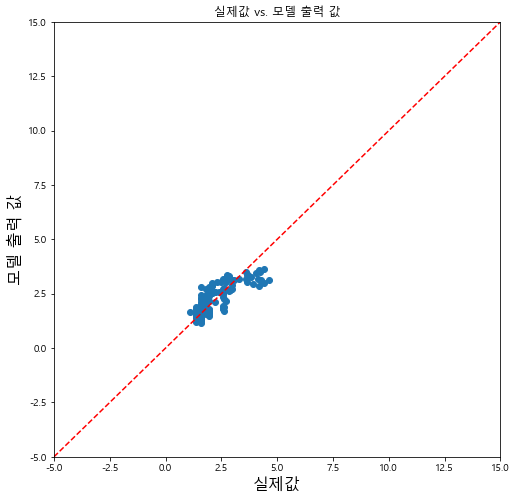

In [95]:
y_train_pred = model_trained.fittedvalues

plt.figure(figsize=(8, 8))
plt.title('실제값 vs. 모델 출력 값')
plt.scatter(y_train, y_train_pred)
plt.plot([-5, 15], [-5, 15], ls="--", c='red')
plt.xlabel('실제값', size=16)
plt.ylabel('모델 출력 값', size=16)
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.show()

In [96]:
X_test = sm.add_constant(X_test)

In [97]:
y_test_pred = model_trained.predict(X_test.drop(['sin_2'], axis=1))
y_test_pred.head()

4      2.857699
120    1.853350
2      2.033680
35     1.271586
75     2.894812
dtype: float64

In [98]:
print(mean_squared_error(y_test, y_test_pred))

0.30966898815321914


In [99]:
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

0.5564790994756399


In [100]:
print(mean_absolute_error(y_test, y_test_pred))

0.43237084284289556


In [101]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

print(mean_absolute_percentage_error(y_test, y_test_pred))

15.945488497142488


In [102]:
print(r2_score(y_test, y_test_pred))

0.6629576006703184


In [103]:
print('Training MSE: {:.3f}'.format(mean_squared_error(y_train, y_train_pred)))
print('Training RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print('Training MAE: {:.3f}'.format(mean_absolute_error(y_train, y_train_pred)))
print('Training MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred)))
print('Training R2: {:.3f}'.format(r2_score(y_train, y_train_pred)))

Training MSE: 0.312
Training RMSE: 0.559
Training MAE: 0.457
Training MAPE: 19.976
Training R2: 0.586


In [104]:
print('Testing MSE: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))
print('Testing RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))
print('Testing MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_test, y_test_pred)))
print('Testing R2: {:.3f}'.format(r2_score(y_test, y_test_pred)))

Testing MSE: 0.310
Testing RMSE: 0.556
Testing MAE: 0.432
Testing MAPE: 15.945
Testing R2: 0.663
